In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *

In [13]:
labels=["Optitype","T1K","HLA-HD","arcasHLA","HISAT","rna2HLA","seq2HLA","PHLAT","HLAforest","HLA-vbseq",'HLAminer']
tool_list=["optitype",'T1K','hlahd',"arcas",'hisat',"rna2hla","seq2hla","phlat","hlaforest","hlavbseq",'hlaminer']


In [10]:
# split predictions into europe and yoruba
groupscsv = "../datasets/SraRunTableD1.txt"
goldstandard = "../datasets/1_gs.csv"
gs = pd.read_csv(goldstandard)
groups = pd.read_csv(groupscsv)

dfs = []

for group, df_by_group in groups.groupby('Population'):
    accession_numbers = df_by_group['Run'].values.tolist()
    gs_final = gs[gs['Run'].isin(accession_numbers)] #gs_final is a df containing the gold standard samples per population group
    dfs.append(gs_final)

europe_df = pd.concat([dfs[0],dfs[1],dfs[2],dfs[3]])
yoruba_df =dfs[4]

In [14]:
def accuracy_matrix(gs,all_total):
    missed_alleles = []


    for t in tool_list:
        pre=pd.read_csv(f"../results/standard/{t}_d1.csv")

        ret = get_miscalled_alleles_only(pre,gs)
        missed_alleles.append(ret)

    mis_total = []

    for tool in missed_alleles:
        mis_counts = [0,0,0,0,0]
        for allele in tool:
            if allele[0] == "A":
                mis_counts[0]+=1
            if allele[0] == "B":
                mis_counts[1] += 1
            if allele[0] == 'C':
                mis_counts[2] += 1
            if allele[0:2] == 'DR':
                mis_counts[3] += 1
            if allele[0:2] == 'DQ':
                mis_counts[4] += 1
        mis_total.append(mis_counts)

    percentage = mis_total/all_total
    accuracy = 1-percentage

    df = pd.DataFrame(accuracy)
    df.columns = ['A','B','C','DRB1','DQB1']
    df.index = tool_list
    return df


Text(0.5, 1.0, 'Accuracy for European samples')

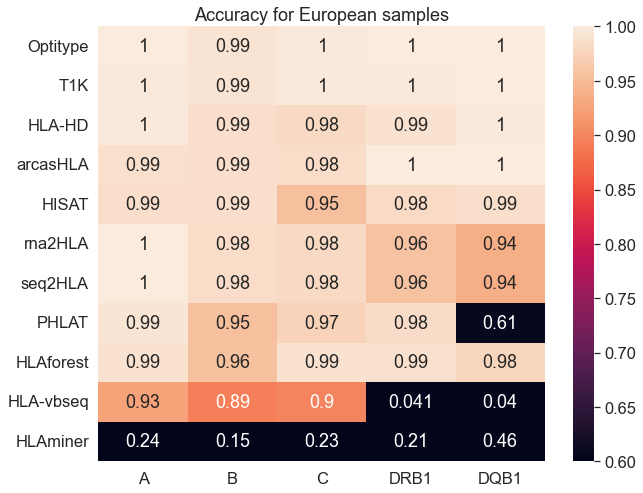

In [15]:

sns.set_context("paper")
sns.color_palette("pastel")
sns.set(font_scale=1.5)

totals = np.array([423*2]*5) #5 element vector with # of gold standard A, B, C, DRB1, and DQB1
df1 = accuracy_matrix(europe_df,totals)
old_labels=list(df1.index)
df1=df1.rename(index=dict(zip(old_labels,labels)))
from matplotlib.colors import LogNorm, Normalize
plt.figure(figsize=(10,8))
sns.heatmap(df1,annot=True,vmin=0.6,vmax=1)

plt.title("Two-field Accuracy for European samples")

Text(0.5, 1.0, 'Accuracy for African samples')

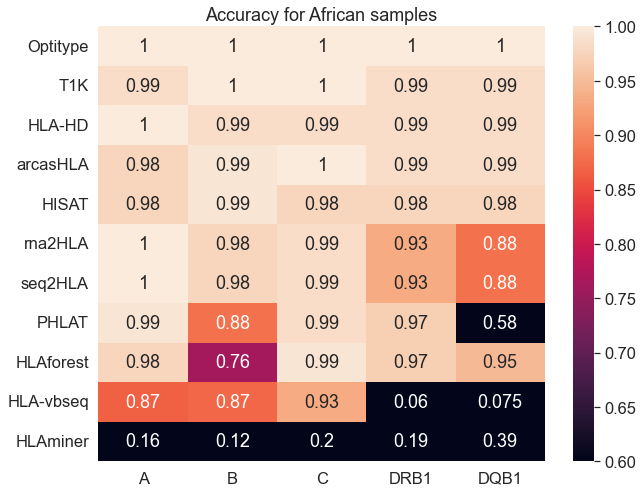

In [16]:
totals = np.array([67*2]*5) #5 element vector with # of gold standard A, B, C, DRB1, and DQB1
df2 = accuracy_matrix(yoruba_df,totals)
old_labels=list(df2.index)
df2=df2.rename(index=dict(zip(old_labels,labels)))
from matplotlib.colors import LogNorm, Normalize
plt.figure(figsize=(10,8))
sns.heatmap(df2,annot=True,vmin=0.6,vmax=1)

plt.title("Two-field Accuracy for African samples")

Text(0.5, 1.0, 'Difference in accuracy between European and African groups (red = greater European accuracy)')

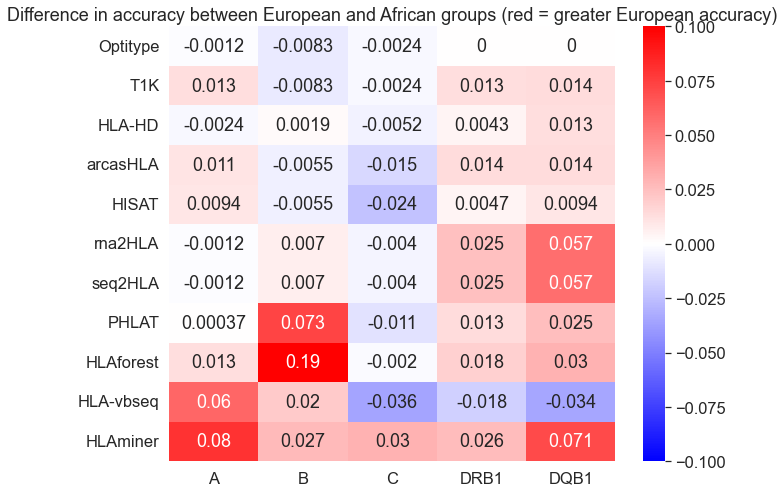

In [17]:
df_overall = df1-df2
old_labels=list(df_overall.index)
df_overall=df_overall.rename(index=dict(zip(old_labels,labels)))
plt.figure(figsize=(10,8))
sns.heatmap(df_overall,annot=True,cmap='bwr',vmin = -0.1, vmax = 0.1)
plt.title("Difference in accuracy between European and African groups (red = greater European accuracy)")